In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [330]:
df = pd.read_csv('churn_dataset.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [331]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [332]:
df.shape

(7043, 21)

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [334]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)

In [335]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [336]:
df.drop(['customerID'],axis=1,inplace=True)

In [337]:
df.dropna(inplace=True)

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [339]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [340]:
k = df.select_dtypes(include = 'number')

In [341]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

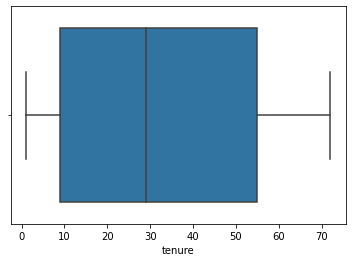

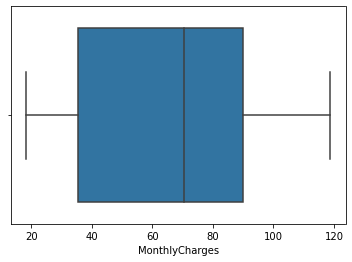

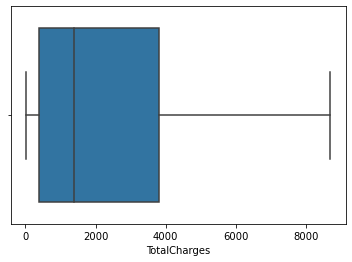

In [342]:
for col in k.columns.tolist():
    sns.boxplot(k[col])
    plt.show()

In [343]:
y = df['Churn']
X = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','MonthlyCharges', 'TotalCharges']]

In [344]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5274, 19) (5274,)
(1758, 19) (1758,)


In [345]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3540,Female,0,Yes,Yes,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic)
3504,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
6715,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check
2866,Female,0,No,No,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check
6609,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check


In [346]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,tenure,MonthlyCharges,TotalCharges
3540,72,108.65,7726.35
3504,68,19.95,1377.70
6715,11,89.20,990.30
2866,12,84.60,1017.35
6609,1,20.10,20.10


In [347]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,tenure,MonthlyCharges,TotalCharges
3540,1.628149,1.460662,2.416469
3504,1.464856,-1.495682,-0.392705
6715,-0.862073,0.812400,-0.564123
2866,-0.821250,0.659083,-0.552154
6609,-1.270306,-1.490683,-0.993420


In [348]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

X_train_cat1_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat1_ohe.head()

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3540,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3504,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6715,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2866,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6609,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [349]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat1_ohe], axis=1)

X_train_transformed.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3540,1.628149,1.460662,2.416469,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3504,1.464856,-1.495682,-0.392705,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6715,-0.862073,0.812400,-0.564123,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2866,-0.821250,0.659083,-0.552154,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6609,-1.270306,-1.490683,-0.993420,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [350]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,tenure,MonthlyCharges,TotalCharges
5561,1,20.65,20.65
5814,16,20.60,330.25
2645,1,19.80,19.80
3983,1,24.25,24.25
6438,1,74.40,74.40


In [351]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,tenure,MonthlyCharges,TotalCharges
5561,-1.270306,-1.472352,-0.993177
5814,-0.657957,-1.474018,-0.856184
2645,-1.270306,-1.500682,-0.993553
3983,-1.270306,-1.352365,-0.991584
6438,-1.270306,0.319120,-0.969394


In [352]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5561,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check
5814,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic)
2645,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic)
3983,Male,0,No,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
6438,Male,1,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [353]:
X_test_cat1_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat1_ohe.head()

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5561,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5814,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2645,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3983,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6438,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [354]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat1_ohe], axis=1)

X_test_transformed.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5561,-1.270306,-1.472352,-0.993177,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5814,-0.657957,-1.474018,-0.856184,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2645,-1.270306,-1.500682,-0.993553,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3983,-1.270306,-1.352365,-0.991584,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6438,-1.270306,0.319120,-0.969394,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# Logistic Regression Model

In [355]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

LogisticRegression()

In [356]:
y_test_pred = classifier.predict(X_test_transformed)

<AxesSubplot:xlabel='Churn', ylabel='Count'>

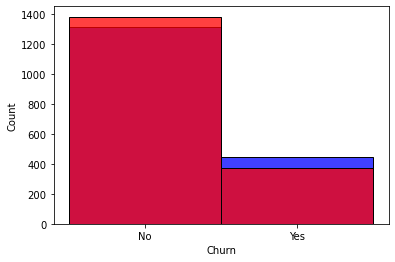

In [357]:
sns.histplot(y_test, color='blue')
sns.histplot(y_test_pred, color='red')

In [358]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_test_pred)

0.8122866894197952

# Decision Tree Classifier

In [301]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [302]:
y_test_pred = classifier.predict(X_test_transformed)

<AxesSubplot:xlabel='Churn', ylabel='Count'>

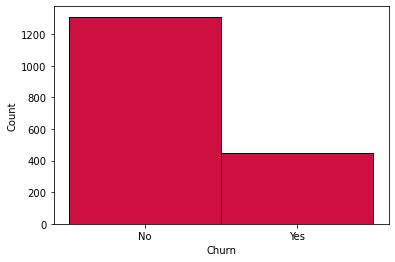

In [303]:
sns.histplot(y_test, color='blue')
sns.histplot(y_test_pred, color='red')

In [304]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_test_pred)

0.7389078498293515

# KNN Classification

In [305]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [306]:
y_test_pred = classifier.predict(X_test_transformed)

In [307]:
metrics.accuracy_score(y_test, y_test_pred)

0.7656427758816837

# Support Vector Classifier

In [308]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed, y_train)

SVC()

In [309]:
y_test_pred = classifier.predict(X_test_transformed)
metrics.accuracy_score(y_test, y_test_pred)

0.8111490329920364

# Naive Bayes Classifier

In [310]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_transformed, y_train)

GaussianNB()

In [311]:
y_test_pred = classifier.predict(X_test_transformed)
metrics.accuracy_score(y_test, y_test_pred)

0.6712172923777019

# Random Forest Classifier

In [312]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [313]:
y_test_pred = classifier.predict(X_test_transformed)
metrics.accuracy_score(y_test, y_test_pred)

0.79806598407281

# Gradient Boosting Classifier

In [314]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train_transformed, y_train)

GradientBoostingClassifier()

In [315]:
y_test_pred = classifier.predict(X_test_transformed)
metrics.accuracy_score(y_test, y_test_pred)

0.8094425483503982

# Ada Boost Classifier

In [317]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train_transformed, y_train)

AdaBoostClassifier()

In [318]:
y_test_pred = classifier.predict(X_test_transformed)
metrics.accuracy_score(y_test, y_test_pred)

0.810580204778157

In [320]:
K = {"Model" : ['Logistic Regression','Support Vector Classifier','AdaBoost Classifier','Gradient Boosting Classifier','Random Forest Classifier','KNN Classifier','Decision Tree Classifier','Naive Bayes Classifier'],
    "Accuracy_score": [0.8122866894197952,0.8111490329920364,0.810580204778157,0.8094425483503982,0.79806598407281,0.7656427758816837,0.7389078498293515,0.6712172923777019]} 

In [321]:
K

{'Model': ['Logistic Regression',
  'Support Vector Classifier',
  'AdaBoost Classifier',
  'Gradient Boosting Classifier',
  'Random Forest Classifier',
  'KNN Classifier',
  'Decision Tree Classifier',
  'Naive Bayes Classifier'],
 'Accuracy_score': [0.8122866894197952,
  0.8111490329920364,
  0.810580204778157,
  0.8094425483503982,
  0.79806598407281,
  0.7656427758816837,
  0.7389078498293515,
  0.6712172923777019]}

In [323]:
df1 = pd.DataFrame(K)

In [329]:
df1
#Logistic Regreesion is giving the best model

,Model,Accuracy_score
0,Logistic Regression,0.812287
1,Support Vector Classifier,0.811149
2,AdaBoost Classifier,0.810580
3,Gradient Boosting Classifier,0.809443
4,Random Forest Classifier,0.798066
5,KNN Classifier,0.765643
6,Decision Tree Classifier,0.738908
7,Naive Bayes Classifier,0.671217


<AxesSubplot:xlabel='Accuracy_score', ylabel='Model'>

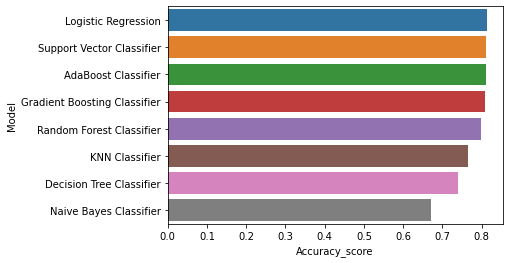

In [328]:
sns.barplot(y = df1.Model,x = df1.Accuracy_score)